## $$"Youtube\ Comments-\ Sentiment\ Analysis"\ Project$$
##### $$Released\ by\ Jakup\ Ymeraj,\ April\ 2025$$

In [114]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [115]:
#Load the dataset
df = pd.read_csv(r"C:\Users\Perdorues\Downloads\Project_Datasets\YoutubeCommentsDataSet.csv")

df.head()

,comment,sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [116]:
from textblob import TextBlob

#declare a function for sentiment analysis
def get_textblob_sentiment(text):
    if isinstance(text, str):  #we need to check if the text is a string
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return 0  #handle non-string input

df['sentiment'] = df['comment'].apply(get_textblob_sentiment)

df.to_csv('comments_with_sentiment.csv', index=False)

print(df)

                                                 comment  sentiment
0      lets not forget that apple pay in 2014 require...   0.075606
1      here in nz 50 of retailers don’t even have con...   0.160000
2      i will forever acknowledge this channel with t...   0.000000
3      whenever i go to a place that doesn’t take app...  -0.195238
4      apple pay is so convenient secure and easy to ...   0.208333
...                                                  ...        ...
18403  i really like the point about engineering tool...   0.344048
18404  i’ve just started exploring this field and thi...   0.333333
18405  excelente video con una pregunta filosófica pr...  -0.800000
18406  hey daniel just discovered your channel a coup...   0.000000
18407  this is great focus is key a playful approach ...   0.470000

[18408 rows x 2 columns]


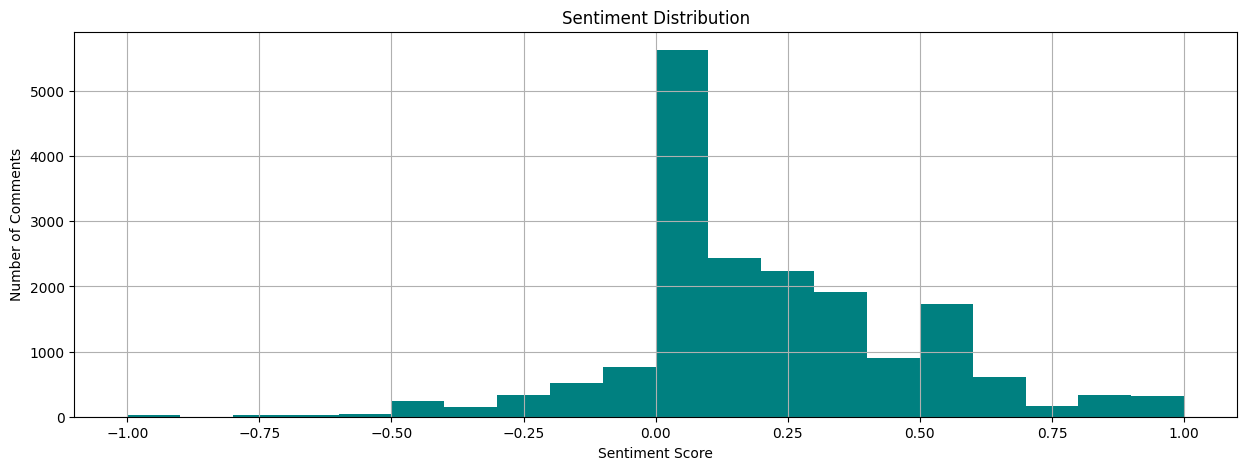

In [117]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#The sentiment distribution
plt.figure(figsize=(15, 5))
plt.hist(df['sentiment'], bins=20, color='teal', alpha=1)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.grid()
plt.show()

### **Key statistics on sentiment**

In [118]:
print("Average Sentiment:", df['sentiment'].mean())
print("Number of Positive Comments:", (df['sentiment'] > 0).sum())
print("Number of Negative Comments:", (df['sentiment'] < 0).sum())
print("Number of Neutral Comments:", (df['sentiment'] == 0).sum())

#Saving the result to a new file
df.to_csv('comments_with_sentiment.csv', index=False)

Average Sentiment: 0.20256734573235496
Number of Positive Comments: 12209
Number of Negative Comments: 2136
Number of Neutral Comments: 4063


### **Building a Machine Learning Model to predict future behaviors using a $Naive$ $Bayes$ Classifier Model**

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [120]:

#preprocess the data
#create sentiment labels based on sentiment scores
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [121]:

#check for missing values and handle them
df['comment'].fillna('', inplace=True)  #replace NaN with an empty string


C:\Users\Perdorues\AppData\Local\Temp\ipykernel_17876\3644043225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment'].fillna('', inplace=True)  #replace NaN with an empty string


In [122]:
#train-test split
X = df['comment']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
#feature extraction using TF-IDF with n-grams
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  #include unigrams and bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [124]:
#define the model and parameter grid
from sklearn.model_selection import GridSearchCV


model = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  #smoothing parameter
}

#perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_tfidf, y_train)

#getting the best parameters and evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 0.1}
Accuracy: 0.7463335143943509
              precision    recall  f1-score   support

    negative       0.82      0.04      0.08       446
     neutral       0.91      0.39      0.54       778
    positive       0.73      0.99      0.84      2458

    accuracy                           0.75      3682
   macro avg       0.82      0.47      0.49      3682
weighted avg       0.78      0.75      0.68      3682



### **Wordcloud**

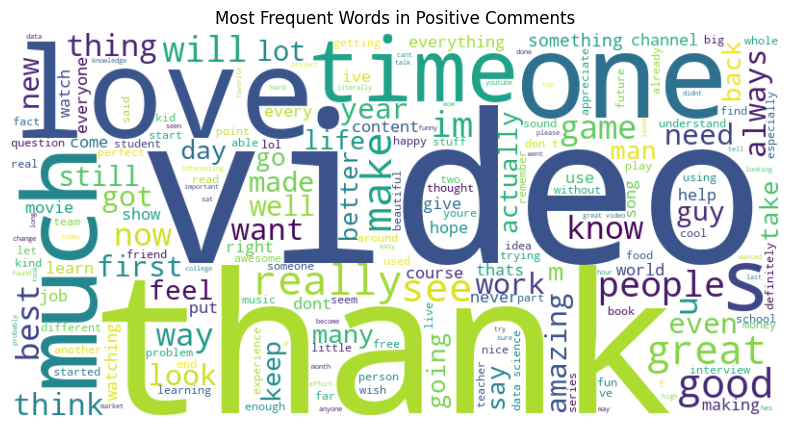

In [125]:

#Lets create a Word Cloud for positive comments only
positive_comments = ' '.join(df[df['sentiment'] > 0]['comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Comments')
plt.show()